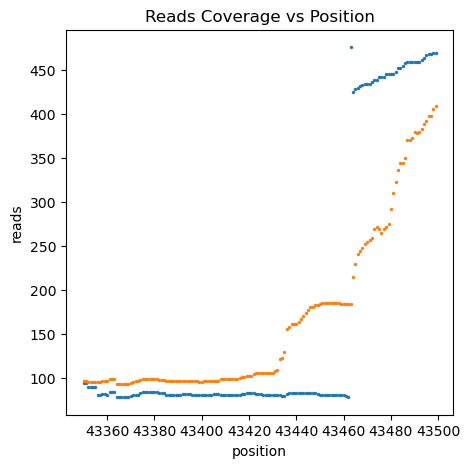

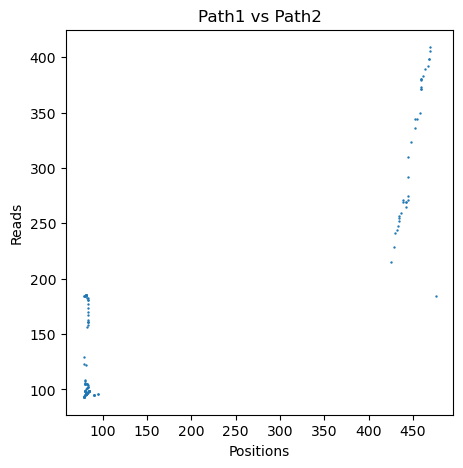

In [113]:
# The Idea is the analysis Phage bubble just like before but automate into many samples: 
import pysam
from pysam.libcalignmentfile import IteratorColumnRegion
import matplotlib.pyplot as plt
from scipy import stats
import os
from Bio import SeqIO


# Truncated Pileup function for precises locating of varying regions.
def pileup_truncated(bam,contig, start, stop):
    """
    Obtain Pysam columns only at selected region
    """
    has_coord, rtid, rstart, rstop = bam.parse_region(contig, start, stop)
    yield from IteratorColumnRegion(bam,
                                    tid=rtid,
                                    start=rstart,
                                    stop=rstop,truncate=True)


def scatter_plot_PHAGEBB_paths(file, paths_loc, start, end):     
    paths = range(1,10)
    ### Finding the contigs for Pileup:
    # first, call contigs as an array, 
    # n will represent the paths (n = 1 : path 1, etc)
    contigs = []
    for n in paths:
        fasta_file = f"PHAGE_BUBBLE/Paths/{paths_loc}/path_{n}.fasta"
        if not os.path.exists(fasta_file): # If the paths doesnt exist, then continue.
            continue
        for record in SeqIO.parse(fasta_file, "fasta"):
            contigs.append(record.id) # Isolate the contigs only using record.id command.
    # print(contigs)
    
    ### Creating a plot for position vs reads
    # First call an array for position and read:
    position: list[str] = []
    reads: list[str] = []
    for n in paths: 
        Pos = []
        Read = []
        if len(contigs) >= n: # contigs is an array of contigs, hence, if len(contigs) > n, then paths will not exist:
            selected_contigs = contigs[n-1] # This code is important for using the correct contigs later in pileup
            # print(selected_contigs)
            file_path = f"PHAGE_BUBBLE/Bam_sorted/{file}_path_{n}_sorted.bam"
            if os.path.exists(file_path): # If filepath exist, then run the next line of code,
                bamfile = pysam.AlignmentFile(file_path, "rb")
                for pileupcolumn in pileup_truncated(bamfile, f"{selected_contigs}".strip("['']"), start, end):
                    Pos.append(pileupcolumn.pos) # This will append the value into the array of position(pos) and reads(n)
                    Read.append(pileupcolumn.n)      
                position.append(Pos)
                reads.append(Read)
## Creating 1 plot for all position vs reads:            
    for n in paths:
        if len(position) >= n:
            plt.rcParams['figure.figsize'] = [5, 5]
            plt.scatter(position[n-1], reads[n-1], 2)
            plt.xlabel('position')
            plt.ylabel('reads')
            plt.title("Reads Coverage vs Position")
            # plt.savefig(f"{file}'s Reads Coverage vs Position.png", dpi=300, bbox_inches='tight', format="png")
            plt.show
## Creating a reads vs reads for some paths:
    for n in paths:
        if len(reads) > n:
            fig, ax = plt.subplots(figsize=(5,5))
            s = 0.5
            ax.scatter(reads[n-1], reads[n], s)
            ax.set_xlabel("Positions")
            ax.set_ylabel("Reads")
            plt.title(f'Path{n} vs Path{n+1}')
            plt.savefig(f"{file} Path {n} vs Path {n+1}")

scatter_plot_PHAGEBB_paths("M524_I6790_27765_Parkes_IBD_292_V4_2_11_16_NEBNextIndex35_CATTTT_S10_L001", "PathsS1",43350,43500)


In [57]:
### Function for printing the coverages and bases at specific position: 
import pysam
import os 
from Bio import SeqIO

def print_coverage_at_base(filepaths, start, end):
    contigs = []
    paths = range(1,10) # These are the paths, the limit was put at 10
    for n in paths:
        fasta_file = f"PHAGE_BUBBLE/Paths/PathsS1/path_{n}.fasta"
        if not os.path.exists(fasta_file):
            continue
        for record in SeqIO.parse(fasta_file, "fasta"):
            contigs.append(record.id)  
    print(contigs)

    for n in paths: 
        selected_contigs = contigs[:n]
        if len(selected_contigs) >= n:       
            selected_contigs = contigs[n-1] # n - 1 as the first digit start at 0
            bamfile = pysam.AlignmentFile(f"PHAGE_BUBBLE/Bam_sorted/{filepaths}_path_{n}_sorted.bam", "rb")
            for pileupcolumn in pileup_truncated(bamfile, f"{selected_contigs}".strip("['']"), start, end):
                print("\ncoverage at base %s = %s" % (pileupcolumn.pos, pileupcolumn.n))
                for pileupread in pileupcolumn.pileups:
                    if not pileupread.is_del and not pileupread.is_refskip:
                        # query position is None if is_del or is_refskip is set.
                        print('\tbase in read %s = %s' % (pileupread.alignment.query_name, pileupread.alignment.query_sequence[pileupread.query_position]))
            bamfile.close()
            
print_coverage_at_base("Phage42", 43375, 43500)

['path_1_edge_91047_edge_5628', 'path_2_edge_91047_edge_91048']

coverage at base 43375 = 41
	base in read M00990:494:000000000-C5HV7:1:1110:24811:5972 = A
	base in read M00990:494:000000000-C5HV7:1:2101:6896:23355 = A
	base in read M00990:494:000000000-C5HV7:1:1102:16165:24479 = A
	base in read M00990:494:000000000-C5HV7:1:1105:6466:17067 = A
	base in read M00990:494:000000000-C5HV7:1:1109:16016:22850 = A
	base in read M00990:494:000000000-C5HV7:1:1114:10137:14568 = A
	base in read M00990:494:000000000-C5HV7:1:2114:4571:20853 = A
	base in read M00990:494:000000000-C5HV7:1:2104:12400:4581 = A
	base in read M00990:494:000000000-C5HV7:1:2101:13383:9199 = A
	base in read M00990:494:000000000-C5HV7:1:1106:13191:19445 = A
	base in read M00990:494:000000000-C5HV7:1:2111:12241:13836 = A
	base in read M00990:494:000000000-C5HV7:1:1106:22679:7566 = A
	base in read M00990:494:000000000-C5HV7:1:1102:17205:7108 = A
	base in read M00990:494:000000000-C5HV7:1:1104:20043:19660 = A
	base in read M0099

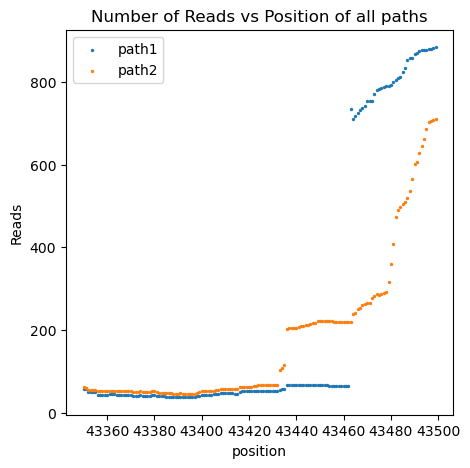

In [97]:
# The Idea is the analysis Phage bubble just like before but automate into many samples: 
import pysam
from pysam.libcalignmentfile import IteratorColumnRegion
import matplotlib.pyplot as plt
from scipy import stats
import os
from Bio import SeqIO

def scatter_plot_PHAGEBB_all(file,paths_loc,start,end):     
    paths = range(1,10)
    
    ### Finding the contigs for Pileup:
    # first, call contigs as an array, 
    # n will represent the paths (n = 1 : path 1, etc)
    contigs = []
    for n in paths:
        fasta_file = f"PHAGE_BUBBLE/Paths/{paths_loc}/path_{n}.fasta"
        if not os.path.exists(fasta_file): # If the paths doesnt exist, then continue.
            continue
        for record in SeqIO.parse(fasta_file, "fasta"):
            contigs.append(record.id) # Isolate the contigs only using record.id command.

    ### Creating a plot for position vs reads
    # First call an array for position and read:
    for n in paths: 
        position = []
        reads = []
        if len(contigs) >= n: # contigs is an array of contigs, hence, if len(contigs) > n, then paths will not exist:
            selected_contigs = contigs[n-1] # This code is important for using the correct contigs later in pileup
            file_path = f"PHAGE_BUBBLE/Bam_sorted/{file}_path_{n}_sorted.bam"
            if os.path.exists(file_path): 
                bamfile = pysam.AlignmentFile(file_path, "rb")
                for pileupcolumn in pileup_truncated(bamfile, f"{selected_contigs}".strip("['']"), start, end):
                    position.append(pileupcolumn.pos)
                    reads.append(pileupcolumn.n)                  
    
                ### Creating a plot for all position vs reads: 
                plt.scatter(position, reads, 2, label=f"path{n}")
                plt.xlabel('position')
                plt.ylabel('Reads')
                plt.title(f"{file}'s Reads Coverage vs Position.png")
                plt.savefig(f"{file}'s Reads Coverage vs Position.png", dpi=300, bbox_inches='tight', format="png")
                plt.show



In [247]:
import os

# Set the directory path
directory = "PHAGE_BUBBLE/Bam_sorted"

# Initialize an empty matrix
matrix = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith("_path_1_bam.sorted") or filename.endswith("_path_2_bam.sorted"):
        # Remove the "_path_1_bam.sorted" or "_path_2_bam.sorted" suffix
        base_name = os.path.splitext(filename)[0]
        
        # Split the remaining part of the file name
        parts = base_name.split("_")
        
        # Append the parts to the matrix
        matrix.append(parts)

# Print the matrix
for row in matrix:
    print(row)

FileNotFoundError: [Errno 2] No such file or directory: 'PHAGE_BUBBLE/Bam_sorted'

In [ ]:
# pysam is_secondary for both paths
# if secondary then get rid of alignment
# 